In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## What is the number of observations in the dataset?

In [2]:
df.shape[0]

4622

## What is the number of columns in the dataset?

In [3]:
df.shape[1]

5

## Which was the most-ordered item and how many times it was ordered?

In [4]:
df.groupby('item_name').sum().sort_values(by='quantity', ascending=False).head(1).drop('order_id', axis=1)

,quantity
item_name,
Chicken Bowl,761


## How many different items are sold?

In [5]:
df.item_name.unique().size

50

## How many items were orderd in total?

In [6]:
df.quantity.sum()

4972

## Turn the item price into a float

In [7]:
df.item_price = df.item_price.apply(lambda x: float(x[1:-1]))

## What is the price of each item?

In [8]:
df.drop_duplicates(subset=['item_name', 'choice_description']).tail(10)

,order_id,quantity,item_name,choice_description,item_price
4592,1825,1,Barbacoa Burrito,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",11.75
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75
4594,1825,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Pinto Beans, Sour ...",11.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25


## How much was the revenue for the period in the dataset?

In [9]:
df['item_price'].sum()

34500.16

## How many orders were made in the period?

In [10]:
df.order_id.unique().size

1834

## What is the average revenue amount per order?

In [11]:
df['item_price'].sum()/df.order_id.unique().size

18.811428571428575

## Merge the table dfa that contains order date and order id with df and plot daily revenue

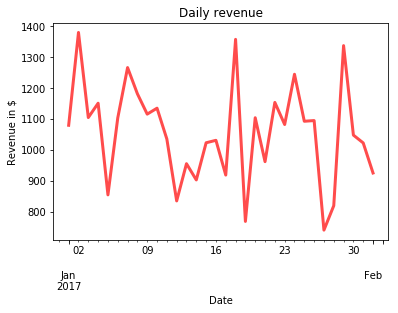

In [12]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
pd.merge(df, dfa).groupby('date').apply(lambda x: sum(x.item_price)).plot(kind='line', c='r', alpha=0.7, linewidth=3)
plt.xlabel('Date')
plt.ylabel('Revenue in $')
plt.title('Daily revenue')
plt.show()

## Create a histogram of the top 5 items bought

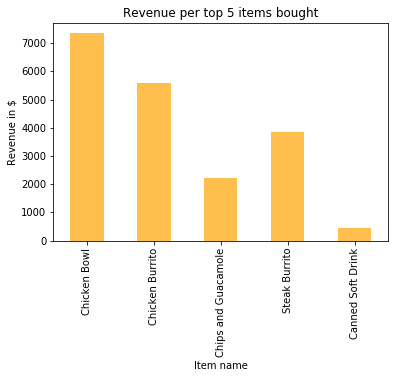

In [13]:
df.groupby('item_name').sum().sort_values(by='quantity', ascending=False).head(5).drop(
    labels=['order_id', 'quantity'], axis=1).plot(kind='bar', legend=None, color='orange', alpha=0.7)

plt.xlabel('Item name')
plt.ylabel('Revenue in $')
plt.title('Revenue per top 5 items bought')
plt.show()


## Sort the dataset by the name of the item

In [14]:
df.sort_values(by='item_name').head(5)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49


## How many times were a Veggie Salad Bowl ordered?

In [15]:
df.set_index('item_name').loc['Veggie Salad Bowl'].quantity.sum()

18

## How many times people orderd more than one Canned Soda?

In [16]:
df[(df.item_name == 'Canned Soda') & (df.quantity > 1)].shape[0]

20

## Create a scatterplot with the number of items orderered per order price

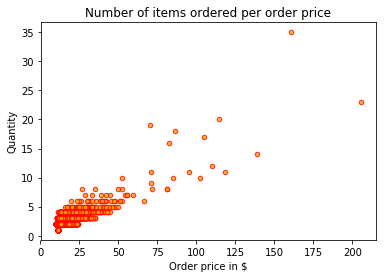

In [17]:
df.groupby('order_id').sum().plot.scatter(x='item_price', y='quantity', c='orange', marker='o', edgecolors='r', alpha=0.8)
plt.xlabel('Order price in $')
plt.ylabel('Quantity')
plt.title('Number of items ordered per order price')
plt.show()